# The Deutsch-Jozsa Algorithm

oracle number: Balanced 5 0b101
Prediction:
Balanced


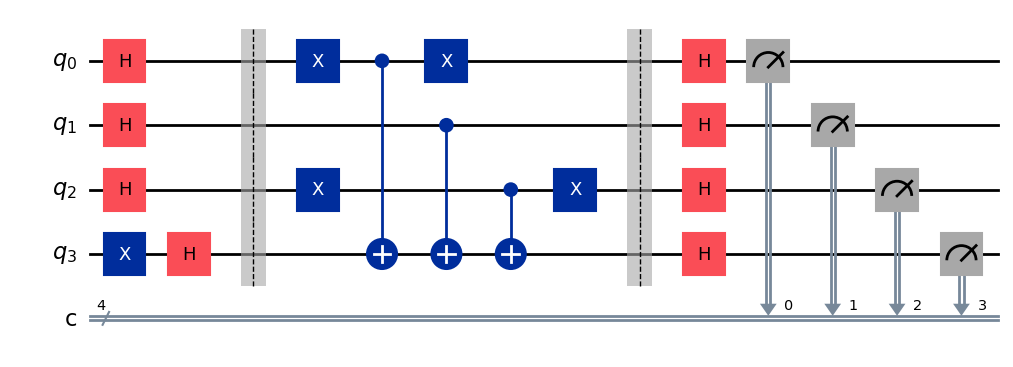

In [6]:
import qiskit
import matplotlib as mpl
from random import choice, randint

class QCDeutschJozsaOracle:
    def __init__(self) -> None:
        self.register_inp_size = 3 # the size of input, we assume the input is a number with 3-bits
        self.register_out_size = 1 # the size of the auxiliary (output) qbit
        self.register_size = self.register_inp_size + self.register_out_size
        self.dj_circuit = None

    def dj_oracle(self,n)->str:     #begin our function
        type = 'Balanced' #choice(['Constant0','Constant1','Balanced'])
        if type == 'Balanced':
            oracle_num = randint(0,(2**n)-1)    #random binary num between
            print('oracle number:',type, oracle_num , str(bin(oracle_num)))
        elif type == 'Constant0':
                print('todo: constant0')
        elif type == 'Constant1':
                print('todo:contant1')
        oracle_num_bin = format(oracle_num , '0'+str(n)+'b')
        for reg in range(0,len(oracle_num_bin)):   #iterate through flipGates
            if oracle_num_bin[reg] == '1':
                self.dj_circuit.x(reg)     #flip qubit if necessary
        for reg in range(0,n):    #CX Gate controlled on every query qubit
            self.dj_circuit.cx(reg,n)   #and targeting auxiliary qubit
        for reg in range(0,len(oracle_num_bin)):   #unflip qubits so output
            if oracle_num_bin[reg] == '1':         #reveals nothing except
                self.dj_circuit.x(reg)                #what the original input was

        return type    

    def simulate(self)->None:
        from qiskit_aer import AerSimulator

        simulator = AerSimulator()
        job = simulator.run(self.dj_circuit,shots=1,memory=True)
        result = job.result()
        measurements = result.get_memory()[0]   #e.g '0000'
        query_state = measurements[-1] #gets the last element in the array
        print('Prediction:')
        if query_state == '1':
            print('Balanced')
        else:    #Constant Query
            print('Constant')
     

    def construct_circuit(self)->None:
        self.dj_circuit = qiskit.QuantumCircuit(self.register_size,self.register_size) # create Deutsch-Jozsa circuit

        for line in range(0,self.register_inp_size):
            self.dj_circuit.h(line)
        self.dj_circuit.x(self.register_inp_size)    #flip Auxiliary
        self.dj_circuit.h(self.register_inp_size)    #put into |-> state

        self.dj_circuit.barrier()
        oracle_type = self.dj_oracle(3)
        self.dj_circuit.barrier()

        #after Oracle function
        for line in range(0,self.register_size):
            self.dj_circuit.h(line)    #apply Hadamard to each qubit
            self.dj_circuit.measure(line,line)    #measure qubit onto respective bit
        
    def run_oracle(self):
        self.construct_circuit()
        self.simulate() # error
        

oracle = QCDeutschJozsaOracle()
oracle.run_oracle()
oracle.dj_circuit.draw('mpl')


